In [137]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from scipy.io import wavfile
from scipy.signal import butter, lfilter

In [138]:
# Read the WAV file
samplerate, data = wavfile.read('test/std.wav')

In [139]:
# Apply Butterworth filter to denoise the audio
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [140]:
# Filter requirements.
order = 6
cutoff = 1200  # desired cutoff frequency of the filter, Hz
# Filter the data, and plot both the original and filtered signals.
filtered_data = butter_lowpass_filter(data, cutoff, samplerate, order)
# Save the filtered data to a new WAV file
wavfile.write('test/filtered_std.wav', samplerate, filtered_data.astype(np.int16))

In [141]:
sound = AudioSegment.from_wav("test/filtered_std.wav")

In [239]:
sound = AudioSegment.from_wav("test/filtered_lijunjie.wav")
# 假设你已经知道签名开始和结束的时间，例如开始于5000毫秒，结束于10000毫秒
start_time = 400000
end_time = 406000
# 切割音频
cut_sound = sound[start_time:end_time]

In [240]:
cut_sound.export("test/lijunjie/18.wav", format="wav")

<_io.BufferedRandom name='test/lijunjie/18.wav'>

In [211]:
# 读取WAV文件
samplerate, data = wavfile.read('test/lijunjie/1.wav')

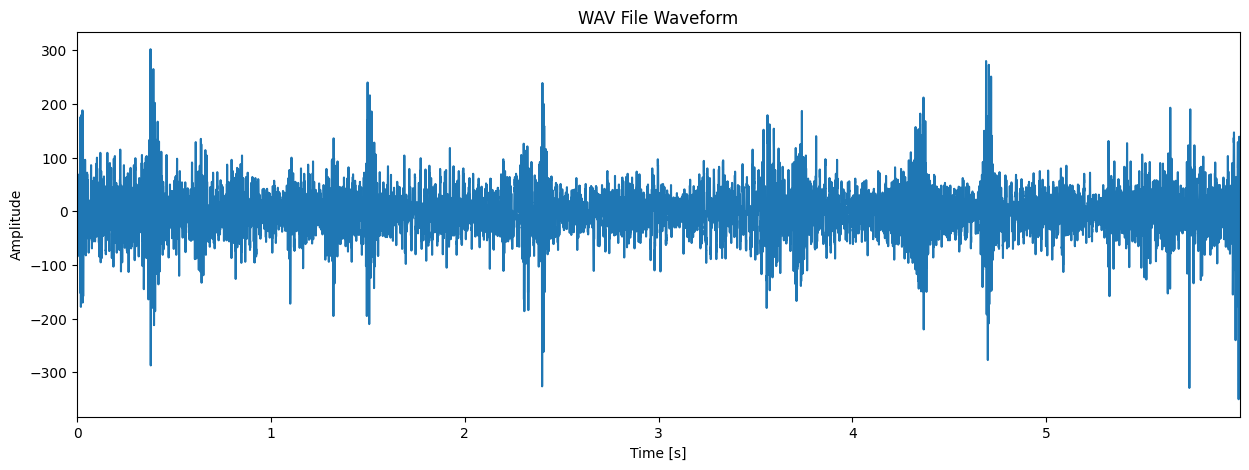

In [241]:
# 读取WAV文件
samplerate, data = wavfile.read('test/lijunjie/18.wav')
times = np.arange(len(data)) / float(samplerate)
# 绘制波形图
plt.figure(figsize=(15, 5))
plt.plot(times, data)
plt.title('WAV File Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.xlim(0, times[-1])
plt.show()

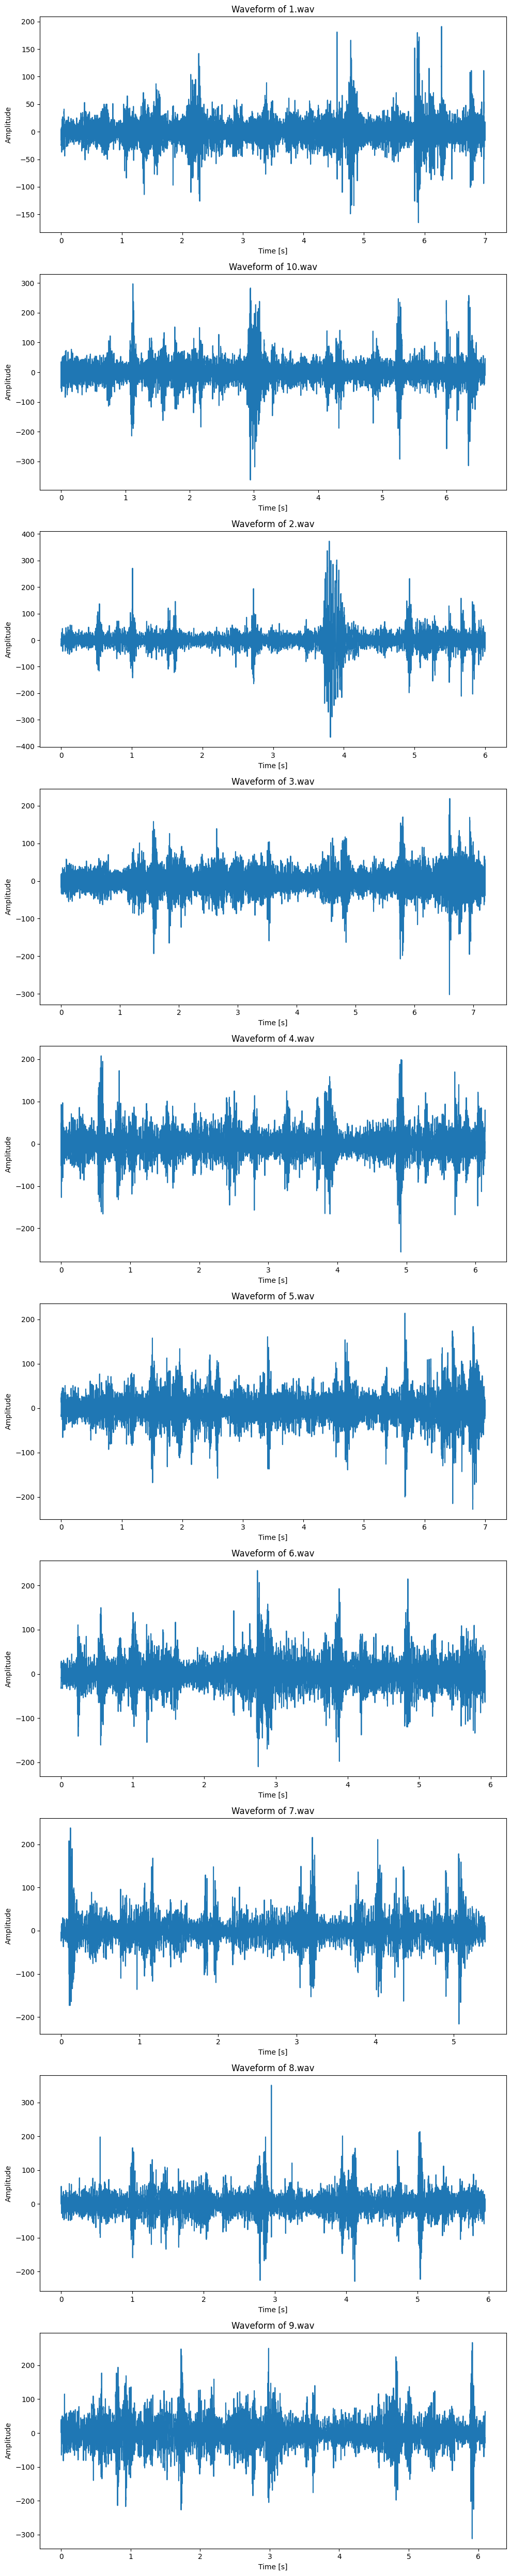

In [136]:
# 定义包含WAV文件的目录路径
wav_directory = 'test/lijunjie'

# 获取目录中所有WAV文件的列表
wav_files = [f for f in os.listdir(wav_directory) if f.endswith('.wav')]

# 创建一个图表窗口
plt.figure(figsize=(10, 5 * len(wav_files)))

# 遍历每个WAV文件并绘制其波形
for i, wav_file in enumerate(wav_files):
    # 读取WAV文件
    samplerate, data = wavfile.read(os.path.join(wav_directory, wav_file))
    
    # 计算时间轴
    times = np.arange(len(data)) / float(samplerate)
    
    # 为每个WAV文件创建一个子图
    plt.subplot(len(wav_files), 1, i + 1)
    plt.plot(times, data)
    plt.title(f'Waveform of {wav_file}')
    plt.ylabel('Amplitude')
    plt.xlabel('Time [s]')

# 调整布局以防止重叠
plt.tight_layout()
plt.show()